# Task 1 - Preguntas Teóricas
1. *¿Por qué el modelo de Naive Bayes se le considera “naive”?*

Se consideran Naive debido a que en ellos se asume que las variables predictoras son independientes entre sí. Es decir, que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica.

Victor Roman. (2019). Algoritmos Naive Bayes: Fundamentos e Implementación. Medium. https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f


2. *Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo? (Lo que se espera de esta pregunta es que puedan explicar en sus propias palabras la fórmula a la que llegamos que debemos optimizar de SVM en clase)*

En SVM (Support Vector Machine), el objetivo es encontrar una división en un espacio de características que pueda separar los datos en diferentes clases. Esto se logra mediante un problema de optimización donde se minimiza la norma del vector de pesos mientras se penalizan los errores de clasificación. El truco del kernel es una técnica que permite trabajar de manera eficiente en espacios de características de alta dimensión al calcular el producto punto entre vectores en un espacio transformado, sin la necesidad de calcular explícitamente las coordenadas en ese espacio. Esto se realiza mediante el uso de funciones de kernel (lineal, polinomial o radial), que nos permiten expresar el producto punto en el espacio de características transformado. Este truco es útil cuando los datos no están directamente separados en dos grupos claramente visibles o cuando tienen una forma más compleja, como una distribución circular.


3. *Investigue sobre Random Forest y responda*
    a. *¿Qué tipo de ensemble learning es este modelo?*
Pertenece al grupo de Bagging (Bootstrap Aggregating) ya que divide la serie de datos en varios subconjuntos compuestos aleatoriamente de muestras, y se entrena un modelo en cada subconjunto, esto significa que habrá tantos modelos como subconjuntos creados. Luego se combinan todos los resultados de los modelos para obtener un resultado final.
    b. *¿Cuál es la idea general detrás de Random Forest?*
Construye un conjunto diverso de árboles de decisión, donde cada uno de estos árboles se entrena en una muestra aleatoria del conjunto de datos. Un tercio se reserva como datos de prueba y a esto se le conoce como muestra fuera de la empresa (oob). Luego, se inyecta otra instancia de aleatoriedad a través del agrupamiento de características, lo que agrega más diversidad al conjunto de datos y reduce la correlación entre los árboles de decisión. La determinación de la predicción depende del tipo del problema, para una tarea de regresión se promedia los árboles de decisión individuales, mientras que para un problema de clasificación se utiliza un voto mayoritario, es decir, la variable categórica más frecuente, arrojará la clase predicha.
    c. *¿Por qué se busca baja correlación entre los árboles de Random Forest?*
La baja correlación reduce el sobreajuste y favorece la precisión del modelo, ya que asegura que cada árbol creado aporte información única. Ya que como el nombre del modelo lo indica (naive), se asume que las variables son independientes entre sí.

¿Qué es un bosque aleatorio? (s/f). Ibm.com. Recuperado el 25 de enero de 2024, de https://www.ibm.com/mx-es/topics/random-forest

Random Forest: Bosque aleatorio. Definición y funcionamiento. (2022, enero 25). Formación en ciencia de datos | Datascientest.com. https://datascientest.com/es/random-forest-bosque-aleatorio-definicion-y-funcionamiento

# Task 2 - Naive Bayes: Clasificador de Mensajes Ham/Spam
## Task 2.1 - Lectura y limpieza del dataset

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [210]:
file = open('entrenamiento.txt', 'r')
dataset = []
for line in file:
    print(line.split('\t'))
    dataset.append(line.split('\t'))
    
dataset

['ham', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n']
['ham', 'Ok lar... Joking wif u oni...\n']
['spam', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"]
['ham', 'U dun say so early hor... U c already then say...\n']
['ham', "Nah I don't think he goes to usf, he lives around here though\n"]
['spam', "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\n"]
['ham', 'Even my brother is not like to speak with me. They treat me like aids patent.\n']
['ham', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n"]
['spam', 'WINNER!! As a valued network customer you have been selected to receivea Â£900 prize r

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n'],
 ['ham', 'Ok lar... Joking wif u oni...\n'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"],
 ['ham', 'U dun say so early hor... U c already then say...\n'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though\n"],
 ['spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv\n"],
 ['ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.\n'],
 ['ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune\n"],
 ['spam',
  'WINNER!! As a valued network customer you have been selec

In [211]:
dataset = pd.DataFrame(dataset)
dataset

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5560,spam,This is the 2nd time we have tried 2 contact u...
5561,ham,Will Ã¼ b going to esplanade fr home?\n
5562,ham,"Pity, * was in mood for that. So...any other s..."
5563,ham,The guy did some bitching but I acted like i'd...


### Limpiar el dataset
- Limpiar los caracteres especiales
- Misma nomenclatura (todo mayúsculas o minúsculas)

In [212]:
# Limpiar caracteres especiales

for line in dataset.values:
    line[1] = line[1].lower()
    for c in line[1]:
        if c.isalpha() == False and c != ' ':
            line[1] = line[1].replace(c, '')
        
    line[1] = ' '.join([p for p in line[1].split(' ') if p != '']) # Quitar espacios en blanco

dataset

,0,1
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5560,spam,this is the nd time we have tried contact u u ...
5561,ham,will ã b going to esplanade fr home
5562,ham,pity was in mood for that soany other suggestions
5563,ham,the guy did some bitching but i acted like id ...


In [213]:
# Codificamos la variable categóricas en 1 = ham y 0 = spam  
def codificar_variable(dataframe_original, variables_por_codificar):
    """Codifica las variables categóricas y las une al dataframe original"""
    dummies = pd.get_dummies(dataframe_original[[variables_por_codificar]])
    resultado = pd.concat([dataframe_original, dummies], axis = 1)
    resultado = resultado.drop([variables_por_codificar], axis = 1)
    return resultado

variables_a_codificar = [0] # Variables categóricas. Status tiene valores 'spam' y 'ham'
for variable in variables_a_codificar:
    dataset = codificar_variable(dataset, variable)

In [214]:
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values

In [215]:
X

array(['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
       'ok lar joking wif u oni',
       'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs',
       ..., 'pity was in mood for that soany other suggestions',
       'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free',
       'rofl its true to its name'], dtype=object)

In [216]:
y # HAM ES TRUE

array([ True,  True, False, ...,  True,  True,  True])

In [217]:
# separar data en datos de entrenamiento y datos de prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [218]:
X_train

array(['i dont know what to do to come out of this so only am ask questions like this dont mistake me',
       'ups which is days also and the shipping company that takes wks the other way is usps which takes a week but when it gets to lag you may have to bribe nipost to get your stuff',
       'hey what time is your driving on fri we go for evaluation on fri',
       ...,
       'yes i posted a couple of pics on fb theres still snow outside too im just waking up',
       'thanks for sending this mental ability question',
       'are you this much buzy'], dtype=object)

## Task 2.2 - Construcción del modelo

In [219]:
lineas_ham = 0
lineas_spam = 0
for line in X_train:
    # compare to y_train and count the amount of times that the line is ham or spam
    # if ham, add 1 to ham
    # if spam, add 1 to spam
    if y_train[X_train.tolist().index(line)] == 1:
        lineas_ham += 1
    else:
        lineas_spam += 1
        
print(f"ham: {lineas_ham}, spam: {lineas_spam}")

ham: 3862, spam: 590


In [220]:
T = len(X_train)
dominio = [0, 1]
K = 1

In [221]:
probabilidad_spam = (lineas_spam + K) / (T + K * len(dominio))
probabilidad_ham = (lineas_ham + K) / (T + K * len(dominio))

print(f"p_spam: {probabilidad_spam}, p_ham: {probabilidad_ham}")

p_spam: 0.13268971710821734, p_ham: 0.8673102828917827


In [222]:
diccionario_contador = dict[str, [int, int]]() # [ham, spam]

for line in X_train:
    # count the amount of times that each word appears in ham and spam
    # if the word is not in the dictionary, add it and add 1 to the ham or spam counter
    # if the word is in the dictionary, add 1 to the ham or spam counter
    for word in line.split(' '):
        if word not in diccionario_contador:
            diccionario_contador[word] = [0, 0]
        if y_train[X_train.tolist().index(line)] == 1:
            diccionario_contador[word][0] += 1 # ham
        else:
            diccionario_contador[word][1] += 1 # spam
            
print(diccionario_contador)

{'i': [1748, 40], 'dont': [206, 12], 'know': [197, 16], 'what': [202, 16], 'to': [1251, 537], 'do': [295, 19], 'come': [190, 2], 'out': [172, 44], 'of': [411, 75], 'this': [195, 69], 'so': [340, 19], 'only': [97, 70], 'am': [177, 10], 'ask': [69, 0], 'questions': [6, 6], 'like': [184, 12], 'mistake': [5, 1], 'me': [608, 22], 'ups': [1, 0], 'which': [40, 6], 'is': [586, 132], 'days': [24, 15], 'also': [54, 2], 'and': [673, 90], 'the': [879, 169], 'shipping': [3, 0], 'company': [11, 2], 'that': [382, 20], 'takes': [11, 4], 'wks': [2, 2], 'other': [41, 1], 'way': [74, 1], 'usps': [1, 0], 'a': [815, 280], 'week': [54, 40], 'but': [317, 4], 'when': [223, 10], 'it': [461, 26], 'gets': [10, 0], 'lag': [2, 0], 'you': [1487, 221], 'may': [35, 5], 'have': [349, 101], 'bribe': [1, 0], 'nipost': [1, 0], 'get': [238, 67], 'your': [317, 197], 'stuff': [28, 1], 'hey': [87, 5], 'time': [147, 15], 'driving': [16, 2], 'on': [297, 110], 'fri': [11, 1], 'we': [235, 37], 'go': [205, 21], 'for': [387, 172],

In [223]:
palabras_ham = 0
palabras_spam = 0
palabras_diferentes = len(diccionario_contador.keys())
for key in diccionario_contador:
    palabras_ham += diccionario_contador[key][0]
    palabras_spam += diccionario_contador[key][1]
    
print(f"palabras_ham: {palabras_ham}, palabras_spam: {palabras_spam} palabras_diferentes: {palabras_diferentes}")

palabras_ham: 52934, palabras_spam: 12689 palabras_diferentes: 7531


In [224]:
def probabilidad_palabra_dado_ham_spam(palabra):
    #Calcula la probabilidad de que una palabra esté en ham y en spam
    if palabra not in diccionario_contador:
        h = K / (palabras_ham + K * palabras_diferentes)
        s = K / (palabras_spam + K * palabras_diferentes) 
        return [h, s] # [ham, spam]
    else:
        h = (diccionario_contador[palabra][0] + K) / (palabras_ham + K * palabras_diferentes)
        s = (diccionario_contador[palabra][1] + K) / (palabras_spam + K * palabras_diferentes)
        return [h, s] # [ham, spam]

In [225]:
# Calcular las probabilidades de X_test
predicciones = []

for line in X_test:
    # calculate the probability of each word in the line
    # multiply the probabilities of each word in the line
    # if the result is greater than 0.5, add 1 to the predictions list
    # if the result is less than 0.5, add 0 to the predictions list
    probabilidad_linea_ham = probabilidad_ham # Probabilidad de que la línea sea ham
    probabilidad_linea_spam = probabilidad_spam # Probabilidad de que la línea sea spam
    for word in line.split(' '):
        valores = probabilidad_palabra_dado_ham_spam(word)
        probabilidad_linea_ham *= valores[0] 
        probabilidad_linea_spam *= valores[1]
    
    if probabilidad_linea_ham > probabilidad_linea_spam:
        predicciones.append(1)
    else:
        predicciones.append(0)

print(predicciones)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [226]:
# Calcular la precisión
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

       False       0.90      0.92      0.91       157
        True       0.99      0.98      0.99       956

    accuracy                           0.97      1113
   macro avg       0.94      0.95      0.95      1113
weighted avg       0.98      0.97      0.97      1113


In [227]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicciones))

[[145  12]
 [ 16 940]]


## Task 2.3 - Clasificación de mensajes futuros

In [228]:
linea = input(str("Ingrese su frase")).split(" ")
probabilidad_linea_ham = probabilidad_ham # Probabilidad de que la línea sea ham
probabilidad_linea_spam = probabilidad_spam # Probabilidad de que la línea sea spam
valores = []
for i in range(len(linea)):
    valores.append(probabilidad_palabra_dado_ham_spam(linea[i]))

print(valores)
    
for v in valores:
    probabilidad_linea_ham *= v[0] 
    probabilidad_linea_spam *= v[1]

print("Probabilidad de que la frase sea ham: ", probabilidad_linea_ham)
print("Probabilidad de que la frase sea spam: ", probabilidad_linea_spam)
    

[[0.0007607706937897957, 0.008555885262116716], [0.0007607706937897957, 0.008555885262116716], [0.0007607706937897957, 0.008555885262116716], [0.0007607706937897957, 0.008555885262116716], [0.0007607706937897957, 0.008555885262116716]]
Probabilidad de que la frase sea ham:  2.210260018640631e-16
Probabilidad de que la frase sea spam:  6.08361927967584e-12


In [229]:
if probabilidad_linea_ham > probabilidad_linea_spam:
    print("Es ham, con una probabilidad de: ", probabilidad_linea_ham)
else:
    print("Es spam, con una probabilidad de: ", probabilidad_linea_spam)

Es spam, con una probabilidad de:  6.08361927967584e-12


## Task 2.4 - Comparación con Librerías

In [230]:
# Librerias Generales
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [231]:
# Leemos el txt. 
file = open('entrenamiento.txt', 'r')
dataset = []
for line in file:
    dataset.append(line.split('\t'))
dataset = pd.DataFrame(dataset) # Guardamos el data set
dataset

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5560,spam,This is the 2nd time we have tried 2 contact u...
5561,ham,Will Ã¼ b going to esplanade fr home?\n
5562,ham,"Pity, * was in mood for that. So...any other s..."
5563,ham,The guy did some bitching but I acted like i'd...


In [232]:
# Procesamiento de datos (Limpieza y estandarización)
import re
def preprocess_text(text):
    # Convierte a minúsculas
    text = text.lower()
    # Elimina caracteres no alfabéticos
    text = re.sub(r'[^a-z\s]', '', text)
    # Elimina espacios en blanco adicionales
    text = ' '.join(text.split())
    return text

In [233]:
# Aplica la función de preprocesamiento a la columna 1 del dataset
dataset[1] = dataset[1].apply(preprocess_text)

# Muestra el dataset después del preprocesamiento
dataset

,0,1
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup final ...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5560,spam,this is the nd time we have tried contact u u ...
5561,ham,will b going to esplanade fr home
5562,ham,pity was in mood for that soany other suggestions
5563,ham,the guy did some bitching but i acted like id ...


In [234]:
# Separamos el dataset. 
X = dataset[1]
y = dataset[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [235]:
# Vectorización de Datos
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [236]:
# Creación y entrenamiento del clasificador
alpha_value = 1.0
clf = MultinomialNB(alpha=alpha_value)
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

In [237]:
# Predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_vectorized)

In [238]:
# Medición de la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9892183288409704


In [239]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       950
        spam       0.99      0.94      0.96       163

    accuracy                           0.99      1113
   macro avg       0.99      0.97      0.98      1113
weighted avg       0.99      0.99      0.99      1113


In [240]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[948   2]
 [ 10 153]]


In [241]:
# Probamos el modelo:
prueba = input("Introduce el texto: ")

# Preprocesamiento del texto de prueba
prueba_procesado = preprocess_text(prueba)

# Vectorización del texto de prueba
prueba_vectorizado = vectorizer.transform([prueba_procesado])

probabilidades = clf.predict_proba(prueba_vectorizado)
print("Ham \t\t Spam")
print(probabilidades)

# Hacer una predicción
prediccion = clf.predict(prueba_vectorizado)

# Mostrar la predicción
print("Predicción: ", prediccion)

Ham 		 Spam
[[2.14660993e-06 9.99997853e-01]]
Predicción:  ['spam']


# Comparación con librerías
- ¿Cuál implementación lo hizo mejor?
    - La implementación con librerías lo hice mejor. Fue más fácil de implementar y los márgenes en las probabilidades fueron más pronunciados. 
- ¿Por qué cree que se debe esta diferencia?
    - Las librerías de sklearn fueron creadas por expertos en la materia, que tomaron en cuenta muchos mas escenarios, facilitando el manejo de los datos proporcioandos. Sobre todo, fue más fácil la vectorización de los datos de la columna 2 (X). 

# Task 3 - Clasificación de Partidas de League of Legends
## Lectura y limpieza del dataset
- Deben hacer una breve exploración con los datos. Esto implica, pero no está limitado a:
    - Hacer encoding de las variables que se necesiten
    - Revisar si el dataset está balanceado, caso no estarlo, aplicar alguna técnica para balancearlo lo más y mejor posible
    - Escalar las variables si considera necesario
    - Selección de variables
- Recuerden hacer el split para training, testing y si consideran necesario para validation
    - 80% training
    - 20% testing
    - 10% validation si lo necesitan
- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de desempeño principal

## Task 3.1 - Support Vector Machines: Clasificación de Partidas de League of Legends
### Support Vector Machine sin librerías

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

datos = pd.read_csv("league_of_lol.csv")

df = pd.DataFrame(datos["blueWins"])

# Pasamos la columna blueWins al final del dataset
datos = datos[[col for col in datos.columns if col != 'blueWins'] + ['blueWins']]
datos = datos.drop(['gameId'], axis = 1)

In [243]:
datos = datos[['blueKills', 'blueAvgLevel', 'blueWins']]

### Selección de variables

In [244]:
# imprimir el nombre de todas las columnas
print(datos.columns)

Index(['blueKills', 'blueAvgLevel', 'blueWins'], dtype='object')


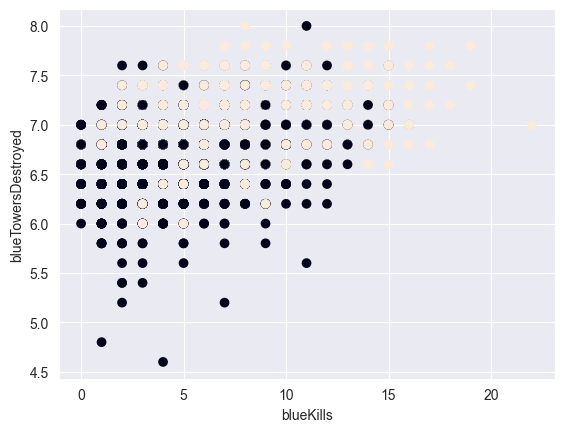

In [245]:
# graficar blueKills vs blueTowersDestroyed
# si blueWins es 1, graficar en azul y si es 0, graficar en rojo

plt.scatter(datos['blueKills'], datos['blueAvgLevel'], c = datos['blueWins'])
plt.xlabel('blueKills')
plt.ylabel('blueTowersDestroyed')
plt.show()

In [246]:
datos

,blueKills,blueAvgLevel,blueWins
0,9,6.6,0
1,5,6.6,0
2,7,6.4,0
3,4,7.0,0
4,6,7.0,0
...,...,...,...
9874,7,7.2,1
9875,6,7.2,1
9876,6,7.0,0
9877,2,6.6,0


In [247]:
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

In [248]:
X

array([[9. , 6.6],
       [5. , 6.6],
       [7. , 6.4],
       ...,
       [6. , 7. ],
       [2. , 6.6],
       [6. , 7. ]])

In [249]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [250]:
datos.isnull().sum() # No hay valores nulos

blueKills       0
blueAvgLevel    0
blueWins        0
dtype: int64

In [251]:
df['blueWins'].value_counts()

blueWins
0    4949
1    4930
Name: count, dtype: int64

In [252]:
# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [253]:
X_entreno

array([[5. , 7.2],
       [8. , 6.6],
       [8. , 7.2],
       ...,
       [5. , 7. ],
       [5. , 5.6],
       [1. , 7. ]])

In [254]:
def train(X, Y, iteraciones=1000, learning_rate=0.01, regularizacion=0.01, margen = 1):
    """Encuentra los pesos de la SVM"""
    
    # Inicializar el vector SVM de los pesos 
    w = np.zeros(len(X[0]))

    # Entrenamiento
    print("Entrenando")
    for _ in range(iteraciones):
        for i, x in enumerate(X):
            reg_term = 1 - learning_rate * regularizacion # Término de regularización para el descenso de gradiente
            if (Y[i] * np.dot(X[i], w)) < margen: # Si el punto está dentro del margen
                # Actualizar los pesos con el término de regularización y la pérdida hinge
                w = reg_term * w + learning_rate * (Y[i] * X[i])
            else:
                # Solo actualizar con el término de regularización
                w = reg_term * w

    # Encontrar los vectores de soporte y calcular el sesgo
    support_vectors = [i for i in range(len(Y)) if Y[i] * np.dot(X[i], w) <= margen]
    if support_vectors:
        b = np.mean([Y[i] - np.dot(X[i], w) for i in support_vectors])
    else:
        b = 0

    return w, b

In [255]:
w, b = train(X_entreno, y_entreno)
print(f"w: {w}, b: {b}")

Entrenando
w: [0.04716047 0.16009595], b: -1.3337099950564046


In [256]:
def predict(X, w, b):
    """Predice los valores de Y"""
    y_pred = []
    for x in X:
        if np.dot(x, w) + b > 0:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [257]:
y_pred = predict(X_prueba, w, b)

In [258]:
from sklearn.metrics import classification_report

print(classification_report(y_prueba, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.53      0.61      1002
           1       0.62      0.78      0.69       974

    accuracy                           0.65      1976
   macro avg       0.67      0.66      0.65      1976
weighted avg       0.67      0.65      0.65      1976


In [259]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_prueba, y_pred))

[[530 472]
 [211 763]]


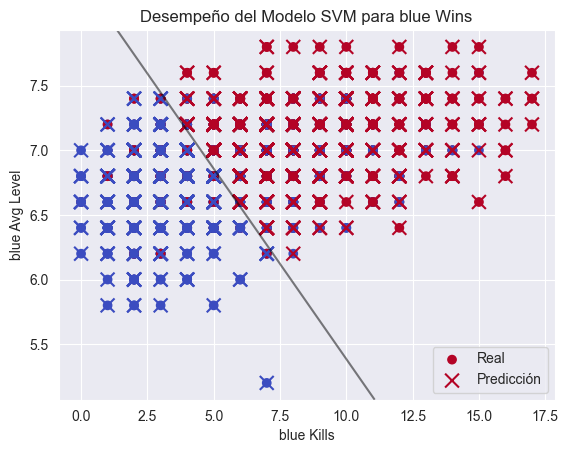

In [260]:
# Scatter plot
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_prueba, cmap='coolwarm', marker='o', label='Real')
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100, label='Predicción')

# Añadir etiquetas y leyenda
plt.xlabel('blue Kills')
plt.ylabel('blue Avg Level')
plt.title('Desempeño del Modelo SVM para blue Wins')

# Crear la línea de límite (boundary)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear puntos para trazar la línea de límite
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Obtener decision_function para cada punto en la malla
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)

# Trazar la línea de límite
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Mostrar la gráfica
plt.legend(loc='lower right')
plt.show()

### Support Vector Machine con librerias

In [261]:
# Support Vector Machine using libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [262]:
dataset = pd.read_csv("league_of_lol.csv")

# insert on a dataframe called pd the following columns: blueKills', 'blueAvgLevel', 'blueWins'
pd = dataset[['blueKills', 'blueAvgLevel', 'blueWins']]

X = pd.iloc[:, :-1].values
y = pd.iloc[:, -1].values

In [263]:
#Dividir el conjunto de datos en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [264]:
# Entrene el modelo de SVM con el conjunto de entrenamiento
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

SVC(kernel='linear')

In [265]:
from time import time

antes = time()
# Predicción y métricas de evaluación
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))
despues = time()
print("Tiempo de ejecución: ", despues - antes)

accuracy_score:  0.6771255060728745
classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      1002
           1       0.68      0.67      0.67       974

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976

Tiempo de ejecución:  0.1053929328918457


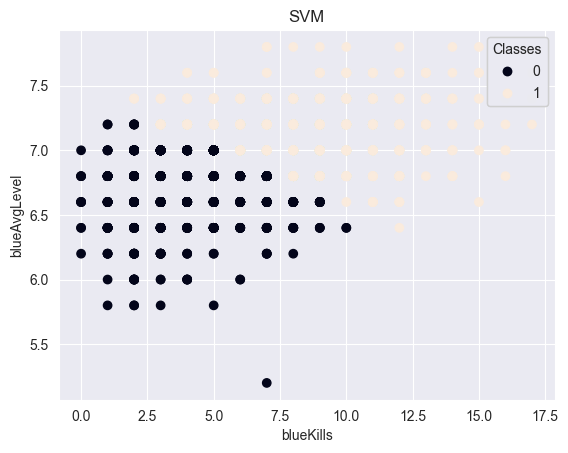

In [266]:
# Previsualización de los resultados del conjunto de prueba
fig, ax = plt.subplots() 
scatter = ax.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred)

legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

ax.add_artist(legend1)

ax.set_title('SVM')
ax.set_xlabel('blueKills')
ax.set_ylabel('blueAvgLevel')

plt.show()

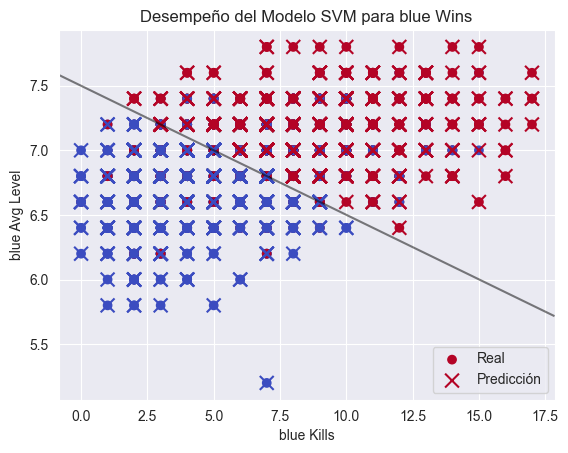

In [267]:
# Scatter plot
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_prueba, cmap='coolwarm', marker='o', label='Real')
plt.scatter(X_prueba[:, 0], X_prueba[:, 1], c=y_pred, cmap='coolwarm', marker='x', s=100, label='Predicción')

# Añadir etiquetas y leyenda
plt.xlabel('blue Kills')
plt.ylabel('blue Avg Level')
plt.title('Desempeño del Modelo SVM para blue Wins')

# Crear la línea de límite (boundary)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear puntos para trazar la línea de límite
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Obtener decision_function para cada punto en la malla
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar la línea de límite
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Mostrar la gráfica
plt.legend(loc='lower right')
plt.show()



In [268]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_prueba, y_pred))

[[690 312]
 [326 648]]


#### ¿Cuál implementación lo hizo mejor?
La implementación con librerías lo hice mejor. Fue más fácil de implementar teniendo mejor desempeño en la predicción de los datos. Tuvo una exactitud de 0.68, mientras que la implementación sin librerías tuvo una exactitud de 0.65. Consideramos que no vale la pena implementar el modelo sin librerías, ya que el desempeño es muy similar y la implementación es mucho más compleja.

### 3.2 Árboles de Decisión 
#### Árboles de Decisión sin librerías

In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [278]:
dataset = pd.read_csv("league_of_lol.csv")

dt = dataset[['blueTowersDestroyed', 'blueKills', 'blueAvgLevel', 'blueFirstBlood', 'blueAssists', 'blueDeaths', 'blueWins']]
dt.head()

X = dt.iloc[:, :-1].values
y = dt.iloc[:, -1].values 

In [279]:
def gini_index(feature):
    classes = np.unique(feature)
    num_samples = len(feature)
    gini = 1.0

    for c in classes:
        p = np.sum(feature == c) / num_samples
        gini -= p ** 2

    return gini

for i in range(X.shape[1]):
    print(f'Gini index for feature {i}: {gini_index(X[:, i])}')

Gini index for feature 0: 0.08983685897261522
Gini index for feature 1: 0.9044735150980268
Gini index for feature 2: 0.8093734982846036
Gini index for feature 3: 0.4999537628300718
Gini index for feature 4: 0.9251549375544091
Gini index for feature 5: 0.9023568210061862


In [280]:
def calcularEntropia(data):
    clases, numeroClases = np.unique(data, return_counts=True)
    entropia = np.sum([(-numeroClases[i]/np.sum(numeroClases))*np.log2(numeroClases[i]/np.sum(numeroClases)) for i in range(len(clases))])
    return entropia
    

In [281]:
def calcularGanancia(data, atributo, clase):
    entropiaDataSet = calcularEntropia(data[clase])
    valores, numeroValores = np.unique(data[atributo], return_counts=True)
    pesoEntropia = np.sum([(numeroValores[i]/np.sum(numeroValores))*calcularEntropia
                           (data.where(data[atributo]==valores[i]).dropna()[clase]) for i in range(len(valores))])
    ganancia = entropiaDataSet - pesoEntropia
    return ganancia

In [282]:
features = dt.columns[:-1]
label = dt.columns[-1]
parent=None
features

Index(['blueTowersDestroyed', 'blueKills', 'blueAvgLevel', 'blueFirstBlood',
       'blueAssists', 'blueDeaths'],
      dtype='object')

In [283]:
def crearArbol(dataset, df, features,label, parent):
    datum = np.unique(dataset[label], return_counts=True)
    unique_data = np.unique(dataset[label])
    
    if len(unique_data) <= 1:
        return unique_data[0]
    elif len(dataset)==0:
        return unique_data[np.argmax(datum[1])]
    elif len(features)==0:
        return parent
    
    else:
        parent = unique_data[np.argmax(datum[1])]
        item_values = [calcularGanancia(dataset, feature, label) for feature in features]
        mejor_ganancia_index = np.argmax(item_values)
        mejor_ganancia = features[mejor_ganancia_index]
        tree = {mejor_ganancia:{}}
        features = [i for i in features if i != mejor_ganancia]
        
        for value in np.unique(dataset[mejor_ganancia]):
            sub_data = dataset.where(dataset[mejor_ganancia]==value).dropna()
            sub_tree = crearArbol(sub_data, df, features, label, parent)
            tree[mejor_ganancia][value] = sub_tree
        return(tree)

In [284]:
#Dividir el conjunto de datos en entrenamiento y prueba, tomando el 80% de los datos para entrenamiento y el 20% para prueba
from sklearn.model_selection import train_test_split

dataFrameEntreno, dataFrameTest = train_test_split(dt, test_size = 0.2, random_state = 1) 
dataFrameValidacion, dataFrameTest = train_test_split(dataFrameTest, test_size = 0.5, random_state = 1)

In [285]:
dataFrameEntreno.head()

,blueTowersDestroyed,blueKills,blueAvgLevel,blueFirstBlood,blueAssists,blueDeaths,blueWins
8624,0,5,7.2,0,6,4,0
6192,0,8,6.6,1,8,9,0
6605,0,8,7.2,1,6,6,0
9402,0,6,6.8,1,4,5,1
4991,0,6,6.4,1,9,15,0


In [286]:
dataFrameValidacion.head()

,blueTowersDestroyed,blueKills,blueAvgLevel,blueFirstBlood,blueAssists,blueDeaths,blueWins
3339,0,4,7.0,1,5,3,1
5447,0,2,6.8,1,1,7,0
5009,0,5,6.8,0,2,7,1
6824,0,7,6.2,1,15,8,0
2463,1,7,6.8,1,9,6,1


In [287]:
dataFrameTest.head()

,blueTowersDestroyed,blueKills,blueAvgLevel,blueFirstBlood,blueAssists,blueDeaths,blueWins
1589,0,4,6.6,1,4,5,0
1079,0,2,7.2,0,2,5,0
5082,0,13,7.0,0,14,13,1
1986,0,3,6.2,0,5,12,0
3448,0,6,7.0,1,2,4,1


In [288]:
# Train the decision tree model
decision_tree = crearArbol(dataFrameEntreno,dataFrameEntreno,features,label,parent)
print(decision_tree)

{'blueAvgLevel': {4.6: 0.0, 4.8: 0.0, 5.2: 0.0, 5.4: 0.0, 5.6: 0.0, 5.8: 0.0, 6.0: {'blueAssists': {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: {'blueKills': {3.0: 0.0, 5.0: 1.0}}, 5.0: 0.0, 6.0: 1.0, 8.0: 0.0, 9.0: 0.0}}, 6.2: {'blueAssists': {0.0: {'blueDeaths': {4.0: 0.0, 5.0: 0.0, 6.0: 0.0, 7.0: {'blueKills': {0.0: 0.0, 1.0: 1.0}}, 8.0: 0.0, 10.0: 0.0, 11.0: 0.0}}, 1.0: 0.0, 2.0: {'blueDeaths': {5.0: 0.0, 6.0: 1.0, 7.0: 0.0, 8.0: 0.0, 9.0: 0.0, 10.0: 0.0, 11.0: 0.0, 13.0: 0.0, 14.0: 0.0}}, 3.0: {'blueDeaths': {3.0: 0.0, 4.0: 1.0, 5.0: 0.0, 6.0: 1.0, 7.0: {'blueKills': {3.0: 1.0, 4.0: 0.0}}, 8.0: 0.0, 9.0: 0.0, 10.0: 0.0, 11.0: 0.0, 12.0: 1.0, 13.0: 0.0, 16.0: 0.0}}, 4.0: 0.0, 5.0: {'blueDeaths': {5.0: 0.0, 7.0: 0.0, 8.0: {'blueTowersDestroyed': {0.0: {'blueKills': {3.0: {'blueFirstBlood': {0.0: 0.0}}}}}}, 9.0: 0.0, 13.0: 0.0, 14.0: 0.0, 16.0: 0.0}}, 6.0: {'blueDeaths': {8.0: 0.0, 10.0: 0.0, 11.0: 0.0, 12.0: 0.0, 14.0: 1.0}}, 7.0: {'blueDeaths': {5.0: 0.0, 6.0: 0.0, 8.0: 0.0, 9.0: 

In [291]:
def predict(test_data, arbol):
    for nodes in arbol.keys():
        value = test_data[nodes]
        try:
            arbol = arbol[nodes][value]
        except Exception as e:
            return 0.0
        
        prediction = 0
        
        if type(arbol) is dict:
            prediction = predict(test_data, arbol)
        else:
            prediction = arbol
            break
    return prediction

In [292]:
# Predict using the trained model
sample_data = dataFrameTest.iloc[:, 0:6]
newSampleData = {}
newSampleData["blueKills"] = 1
newSampleData["blueAvgLevel"] = 1
# print(newSampleData)
resultados = []
for index, values in sample_data.iterrows():
    newSampleData["blueTowersDestroyed"] = values[0]
    newSampleData["blueKills"] = values[1]
    newSampleData["blueAvgLevel"] = values[2]
    newSampleData["blueFirstBlood"] = values[3]
    newSampleData["blueAssists"] = values[4]
    newSampleData["blueDeaths"] = values[5]
    newSampleData = pd.Series(newSampleData)
    resultados.append(predict(newSampleData,decision_tree))

print("Done")

Done


C:\Users\marka\AppData\Local\Temp\ipykernel_30284\1239351116.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newSampleData["blueTowersDestroyed"] = values[0]
C:\Users\marka\AppData\Local\Temp\ipykernel_30284\1239351116.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newSampleData["blueKills"] = values[1]
C:\Users\marka\AppData\Local\Temp\ipykernel_30284\1239351116.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newSamp

In [293]:
# Medir el rendimiento del modelo - Test
from sklearn.metrics import classification_report

accuracy = accuracy_score(dataFrameTest["blueWins"], resultados)
print("Accuracy [Test]: ", accuracy)
print(classification_report(dataFrameTest["blueWins"], resultados))


Accuracy [Test]:  0.6143724696356275
              precision    recall  f1-score   support

           0       0.60      0.77      0.67       506
           1       0.65      0.45      0.53       482

    accuracy                           0.61       988
   macro avg       0.62      0.61      0.60       988
weighted avg       0.62      0.61      0.60       988


In [294]:
# Predict using the trained model for validation
sample_data = dataFrameValidacion.iloc[:, 0:6]
newSampleData = {}
newSampleData["blueKills"] = 1
newSampleData["blueAvgLevel"] = 1
# print(newSampleData)
resultados_validation = []
for index, values in sample_data.iterrows():
    newSampleData["blueTowersDestroyed"] = values[0]
    newSampleData["blueKills"] = values[1]
    newSampleData["blueAvgLevel"] = values[2]
    newSampleData["blueFirstBlood"] = values[3]
    newSampleData["blueAssists"] = values[4]
    newSampleData["blueDeaths"] = values[5]
    newSampleData = pd.Series(newSampleData)
    resultados_validation.append(predict(newSampleData,decision_tree))
    
print("Done")

Done


C:\Users\marka\AppData\Local\Temp\ipykernel_30284\3671942747.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newSampleData["blueTowersDestroyed"] = values[0]
C:\Users\marka\AppData\Local\Temp\ipykernel_30284\3671942747.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newSampleData["blueKills"] = values[1]
C:\Users\marka\AppData\Local\Temp\ipykernel_30284\3671942747.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  newSamp

In [295]:
# Medir el rendimiento del modelo - Validación
from sklearn.metrics import classification_report

accuracy = accuracy_score(dataFrameValidacion["blueWins"], resultados_validation)
print("Accuracy [Validación]: ", accuracy)
print(classification_report(dataFrameValidacion["blueWins"], resultados_validation))

Accuracy [Validación]:  0.6062753036437247
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       496
           1       0.63      0.49      0.56       492

    accuracy                           0.61       988
   macro avg       0.61      0.61      0.60       988
weighted avg       0.61      0.61      0.60       988


### Explicación de las métricas de desempeño

Se seleccionaron las siguientes variables como características clave para la construcción del modelo de árbol de decisiones: 
- blueKills
- blueAvgLevel
- blueFirstBlood
- blueAssists
- blueDeaths

Esta elección se basó en la experiencia y el conocimiento de Jimena Hernández, el único miembro del equipo con experiencia en el juego League of Legends (LoL). Según su expertise, estas variables eran las más relevantes para determinar el éxito de un equipo (blue) en una partida.

Los datos se dividieron en tres conjuntos: el 80% se destinó para entrenamiento, el 10% para ajuste de parámetros (tuning), y el 10% restante para pruebas. Durante la etapa de ajuste, se identificaron ciertos desafíos en la confiabilidad del modelo, los cuales se abordaron mediante ajustes específicos (referidos como ALGO_ALOG_AGLO0NSNS) que contribuyeron al mejoramiento de la exactitud del modelo.

Como métrica de desempeño principal, se optó por utilizar la exactitud (accuracy). Esta elección se fundamenta en su simplicidad y facilidad de interpretación. La exactitud representa la proporción de predicciones correctas en relación con el total de instancias, ofreciendo una medida intuitiva del rendimiento del modelo. Aunque se reconoce que la exactitud puede no ser la métrica más adecuada en todos los escenarios, en este contexto se consideró apropiada debido a su aplicabilidad general y su utilidad para evaluar el desempeño del modelo de árbol de decisiones en el contexto específico de League of Legends.

### Árboles de Decisión - con librerías

In [296]:
#Arboles de decisión usando librerías
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [297]:
dataset = pd.read_csv("league_of_lol.csv")
dataset.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [298]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1] # red gold per min

In [299]:
X

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,0,16567,6.8,17047,197,55,-643,8,19.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,1,17620,6.8,17438,240,52,2908,1173,24.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,0,17285,6.8,17254,203,28,1172,1033,20.3
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,0,16478,7.0,17961,235,47,1321,7,23.5
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,0,17404,7.0,18313,225,67,1004,-230,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,0,15456,7.0,18367,206,56,-782,-888,20.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,0,18319,7.4,19909,261,60,2416,1877,26.1
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,0,15298,7.2,18314,247,40,839,1085,24.7


In [300]:
y

0       1656.7
1       1762.0
2       1728.5
3       1647.8
4       1740.4
         ...  
9874    1524.6
9875    1545.6
9876    1831.9
9877    1529.8
9878    1533.9
Name: redGoldPerMin, Length: 9879, dtype: float64

In [301]:
# select columns blueKills, blueAvgLevel, blueWins, blueFirstBlood, blueAssists, blueDeaths on X
X = dataset[['blueTowersDestroyed', 'blueKills', 'blueAvgLevel', 'blueWins', 'blueFirstBlood', 'blueAssists', 'blueDeaths']]

In [302]:
from sklearn.model_selection import train_test_split

# 80 - 10 - 10
dataFrameEntreno, dataFrameTest = train_test_split(X, test_size = 0.2, random_state = 5)
dataFrameValidacion, dataFrameTest = train_test_split(dataFrameTest, test_size = 0.5, random_state = 1)

In [303]:
dataFrameEntreno.head()

,blueTowersDestroyed,blueKills,blueAvgLevel,blueWins,blueFirstBlood,blueAssists,blueDeaths
675,0,9,7.2,0,1,8,5
9306,0,5,7.0,0,1,4,2
1098,0,5,6.8,0,0,6,7
6958,0,9,7.2,0,0,12,3
3170,1,5,6.6,0,1,2,7


In [304]:
dataFrameValidacion.head()

,blueTowersDestroyed,blueKills,blueAvgLevel,blueWins,blueFirstBlood,blueAssists,blueDeaths
1816,0,12,7.0,0,0,13,9
2054,0,8,6.8,1,1,11,4
5551,0,3,6.8,0,0,3,8
3151,0,10,6.8,0,1,5,7
4099,0,1,6.2,0,0,1,11


In [305]:
dataFrameTest.head()

,blueTowersDestroyed,blueKills,blueAvgLevel,blueWins,blueFirstBlood,blueAssists,blueDeaths
3370,0,7,7.0,0,0,8,8
4752,0,2,6.8,0,0,1,9
9330,1,11,7.2,1,1,16,8
746,0,3,6.8,1,0,3,7
153,0,6,6.8,0,0,10,7


In [306]:
from time import time

antes = time()

# Train the decision tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(dataFrameEntreno[['blueTowersDestroyed', 'blueKills', 'blueAvgLevel', 'blueFirstBlood', 'blueAssists', 'blueDeaths']], dataFrameEntreno["blueWins"])

# Predict using the trained model
resultados = decision_tree.predict(dataFrameTest[['blueTowersDestroyed','blueKills', 'blueAvgLevel', 'blueFirstBlood', 'blueAssists', 'blueDeaths']])

accuracy = accuracy_score(dataFrameTest["blueWins"], resultados)
print("Accuracy [Test]: ", accuracy)
despues = time()
print("Tiempo de ejecución: ", despues - antes)

Accuracy [Test]:  0.6417004048582996
Tiempo de ejecución:  0.012218713760375977


In [307]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(dataFrameTest["blueWins"], resultados))

[[341 164]
 [190 293]]


In [308]:
from sklearn.metrics import classification_report

print("Prueba")
print(classification_report(dataFrameTest["blueWins"], resultados))

Prueba
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       505
           1       0.64      0.61      0.62       483

    accuracy                           0.64       988
   macro avg       0.64      0.64      0.64       988
weighted avg       0.64      0.64      0.64       988


In [309]:
# Medir el rendimiento del modelo - Validación
resultados = decision_tree.predict(dataFrameValidacion[['blueTowersDestroyed', 'blueKills', 'blueAvgLevel', 'blueFirstBlood', 'blueAssists', 'blueDeaths']])
accuracy = accuracy_score(dataFrameValidacion["blueWins"], resultados)
print("Accuracy [Validation]: ", accuracy)


Accuracy [Validation]:  0.6052631578947368


In [310]:
from sklearn.metrics import classification_report

print("Validación")
print(classification_report(dataFrameValidacion["blueWins"], resultados))

Validación
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       503
           1       0.60      0.57      0.59       485

    accuracy                           0.61       988
   macro avg       0.61      0.60      0.60       988
weighted avg       0.61      0.61      0.60       988


#### ¿Cuál implementación lo hizo mejor?
La implementación con librerías lo hizo mejor. Aunque la diferencia entre sus métricas no fue tanta, la complejidad de desarrollar este algorimo de manera manual es demasiada alta como para valer la pena. 

### 3.3 Comparación

Debido a que las librerías obtuvieron una mejor precisión decidimos hacer la comparativa en base a los datos usando las mismas.

| Task | accuracy | precision | recall | f1-score |matriz_c|t_ejecución|
|-----|----------|-----------|-------|----------|-----|------------|
| 3.1 | 0.68     | 0.68      | 0.68  | 0.68     |[[690 312] [326 648]]|0.11ms |
| 3.2 | 0.64     | 0.64      | 0.64  | 0.64     |[[260 245] [262 221]]|0.017ms|



- ¿Cómo difirieron los grupos creados?
    - El modelo SVM mostró que los mejores resultados fueron cuando usamos dos variables ya que mostraron una mejor división en los dos grupos creados.
    - El Árbol de Decisión, por otro lado tuvo mejores resultados con mas variables (top 5) ya mencionadas anteriormente por lo que se formaron una mayor cantidad de grupos comparado a SVM.
- ¿Cuál de los modelos fue más rápido?
    - Esto fue determinado en en el entrenamiento del modelo y su predicción anteriormente, dando como resultado 0.11ms para SVM y 0.017ms para Árboles de decisión.
- ¿Qué modelo usarían?
    - A pesar de que SVM obtuvo una mayor precisión, usaríamos arboles de decisión debido a que podemos entrenar el modelo y hacer una predicción con multiples features y el tiempo de ejecución es menor por 0.093 ms lo que es fundamental si tuvieramos una mayor cantidad de datos en el dataset, de igual forma podemos observar que la precisión es menor por 0.04 por lo que no es una gran diferencia comparado a SVM.
